# Retour de l'examinateur

- Créer plus variables
- Faire des regroupements (zone industrielle, zone d'habitation, prendre en compte les coordonnées géo)

# Résumé

Cette partie a consisté a testé et a évalué plusieurs regresseurs pour la prédiction des variables SiteEnergyUse(kBtu) (énergie) et TotalGHGEmissions (émissions de CO2).

Plusieurs nouvelles variables ont été crées : 3 variables numériques relatives aux ratios d'énergie utilisées par bâtiment suivant le type d'énergie et 3 variables booléennes indiquant si le ratio est positif ou non.

Le dataset a été séparé en jeu d'entrainement et de validation. 

Un pipeline de preprocessing a été défini, il emboîte différentes étapes qui s'appliquent aux variables numériques et catégorielles (imputation, standardisation,...).

Plusieurs regresseurs ont été choisis : 
   - 'Dummy': DummyRegressor(),
   - 'Linear': LinearRegression(),
   - 'Ridge' : Ridge(),
   - 'Lasso' : Lasso(),
   - 'Elastic Net': ElasticNet(),
   - 'SVR': SVR(kernel="rbf", C=300, gamma=1),
   - 'Random Forest': RandomForestRegressor(n_estimators=100, n_jobs=-1),
   - 'Extra Tree': ExtraTreesRegressor(n_estimators=100, n_jobs=-1),
   - 'Gradient Boosting': GradientBoostingRegressor(n_estimators=100)
   
Deux métriques ont été sélectionnés pour évaluer nos modèles : RMSE et R2

La pertinence de l'utilisation d'un Target Transformer (Power Transformer Yeo-Johnson) a été évalué. Aucune amélioration des scores n'a été observé pour tous les régresseurs testés. Son utilisation a donc été rejetée.

Après comparaison des scores obtenus pour chaque modèle, GradientBoostingRegressor a été retenu pour la prédiction des deux targets.

Pour chaque target :
- une optimisation a été effectué via une recherche des meilleurs hyperparamètres (RandomizedSearchCV),
- un graphique de l'importance de la contribution de chaque variable a été édité (features_importance_plot).

Ce dernier point a pu mettre en évidence que la variable EnergyStarScore possède une relativement faible importance pour la prédiction de TotalGHGEmissions.

A partir de ce graphique il a été possible de sélectionner les variables les plus importantes pour le modèle permettant ainsi de l'optimiser. La visualisation de cette optimisation a été mise en évidence par les courbes d'apprentissage (learning curve). Le retrait de variables inoportuns permettant de réduire le temps de calcul, de réduire l'overfitting. Cependant les deux modèles crées comportantes une certaine part de biais.

La dernière partie présente l'influence de certains hyperparamètres de GradientBoostingRegressor sur la RMSE.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Retour-de-l'examinateur" data-toc-modified-id="Retour-de-l'examinateur-1">Retour de l'examinateur</a></span></li><li><span><a href="#Résumé" data-toc-modified-id="Résumé-2">Résumé</a></span><ul class="toc-item"><li><span><a href="#Bibliographie" data-toc-modified-id="Bibliographie-2.1">Bibliographie</a></span></li><li><span><a href="#Contexte" data-toc-modified-id="Contexte-2.2">Contexte</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2.3">Feature Engineering</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-2.4">Train Test Split</a></span></li><li><span><a href="#Preprocessor-:-Définition-des-étapes-de-preprocessing" data-toc-modified-id="Preprocessor-:-Définition-des-étapes-de-preprocessing-2.5">Preprocessor : Définition des étapes de preprocessing</a></span></li><li><span><a href="#Pipeline---TransformedTargetRegressor" data-toc-modified-id="Pipeline---TransformedTargetRegressor-2.6">Pipeline - TransformedTargetRegressor</a></span></li><li><span><a href="#Regressors" data-toc-modified-id="Regressors-2.7">Regressors</a></span></li><li><span><a href="#Evaluation-du-pipeline-avec-et-sans-target-transformer" data-toc-modified-id="Evaluation-du-pipeline-avec-et-sans-target-transformer-2.8">Evaluation du pipeline avec et sans target transformer</a></span></li><li><span><a href="#Modèle-pour-la-variable-énergie" data-toc-modified-id="Modèle-pour-la-variable-énergie-2.9">Modèle pour la variable énergie</a></span></li><li><span><a href="#Explication-:-Gradient-Boosting-Regressor" data-toc-modified-id="Explication-:-Gradient-Boosting-Regressor-2.10">Explication : Gradient Boosting Regressor</a></span><ul class="toc-item"><li><span><a href="#Ensembles-and-boosting" data-toc-modified-id="Ensembles-and-boosting-2.10.1">Ensembles and boosting</a></span></li><li><span><a href="#Gradient-boosting-explained" data-toc-modified-id="Gradient-boosting-explained-2.10.2">Gradient boosting explained</a></span></li><li><span><a href="#Gradient-Boosting-Trees" data-toc-modified-id="Gradient-Boosting-Trees-2.10.3">Gradient Boosting Trees</a></span></li></ul></li><li><span><a href="#Optimisation-du-modèle---variable-énergie" data-toc-modified-id="Optimisation-du-modèle---variable-énergie-2.11">Optimisation du modèle - variable énergie</a></span><ul class="toc-item"><li><span><a href="#Optimisation-avec-Feature-Selection" data-toc-modified-id="Optimisation-avec-Feature-Selection-2.11.1">Optimisation avec Feature Selection</a></span></li></ul></li><li><span><a href="#Modèle-pour-la-variable-émissions" data-toc-modified-id="Modèle-pour-la-variable-émissions-2.12">Modèle pour la variable émissions</a></span></li><li><span><a href="#Optimisation-du-modèle---variable-émission" data-toc-modified-id="Optimisation-du-modèle---variable-émission-2.13">Optimisation du modèle - variable émission</a></span><ul class="toc-item"><li><span><a href="#Optimisation-avec-Feature-Selection" data-toc-modified-id="Optimisation-avec-Feature-Selection-2.13.1">Optimisation avec Feature Selection</a></span></li></ul></li><li><span><a href="#Evaluation-de-l'influence-des-hyperparamètres,-prédiction-de-TotalGHGEmissions" data-toc-modified-id="Evaluation-de-l'influence-des-hyperparamètres,-prédiction-de-TotalGHGEmissions-2.14">Evaluation de l'influence des hyperparamètres, prédiction de TotalGHGEmissions</a></span></li></ul></li></ul></div>

## Bibliographie

Multioutput Regression Algorithms
https://machinelearningmastery.com/multi-output-regression-models-with-python/

Simple Guide to Scikit-learn Pipelines
https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf

Pipelines & Custom Transformers in scikit-learn: The step-by-step guide
https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156

Pipelines Kaggle
https://www.kaggle.com/alexisbcook/pipelines

Tips
https://github.com/nabti/scikit-learn-tips

Outliers detection and removal in Pipeline
https://stackoverflow.com/questions/52346725/can-i-add-outlier-detection-and-removal-to-scikit-learn-pipeline
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

Power Transformer Pipeline
https://machinelearningmastery.com/power-transforms-with-scikit-learn/

Data Preparation Techniques
https://machinelearningmastery.com/data-preparation-techniques-for-machine-learning/

Data Cleaning Basic (Use of  VarianceThreshold)
https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/

Compare the effect of different scalers on data with outliers
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#results
https://scikit-learn.org/stable/modules/preprocessing.html

Target transformer
https://scikit-learn.org/stable/modules/compose.html#transformed-target-regressor

Model Validation 
https://www.kaggle.com/dansbecker/model-validation

Dataset transformations
https://scikit-learn.org/stable/data_transforms.html

Custom Transformer
https://medium.com/analytics-vidhya/scikit-learn-pipelines-with-custom-transformer-a-step-by-step-guide-9b9b886fd2cc
https://dreisbach.us/articles/building-scikit-learn-compatible-transforme

Linear regression models
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Poisson regression and non-normal loss
https://scikit-learn.org/stable/auto_examples/linear_model/plot_poisson_regression_non_normal_loss.html#sphx-glr-auto-examples-linear-model-plot-poisson-regression-non-normal-loss-py

Introducing the ColumnTransformer
https://jorisvandenbossche.github.io/blog/2018/05/28/scikit-learn-columntransformer/

Transforming target in regression
https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression
https://machinelearningmastery.com/how-to-transform-target-variables-for-regression-with-scikit-learn/

Effect of transforming the targets in regression model
https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html

Metrics
https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

Simultaneous feature preprocessing
https://www.tomasbeuzen.com/post/scikit-learn-gridsearch-pipelines/

PROJET COVID

MODEL SELECTION AND EVALUATION
https://scikit-learn.org/stable/model_selection.html

Pipelining : Pipeline + GridSearchCV + Scoring
https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

How to Tune Algorithm Parameters with Scikit-Learn
https://scikit-learn.org/stable/modules/grid_search.html
https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/

Custom Transformers

"Often during preprocessing and feature selection, we write our own functions that transform the data (e.g. drop columns, multiply two columns together, etc.). To incorporate those actions into your pipeline, you'll likely need to write your own transformer class."

https://gist.github.com/amberjrivera/8c5c145516f5a2e894681e16a8095b5c

"FunctionTransformer is useful because it allows you to apply a custom function in a pipeline. Because Pipeline() from sklearn.pipeline only works with objects that implement the .transform() and .fit() methods, you use FunctionTransformer to change your custom function to allow .transform() and/or .fit() to be used on it.
You could transform a DataFrame or Series by using .apply() (or something similar like a list comprehension), but you wouldn't be able to use that function in Pipeline() without first using Function Transformer.
(answer adapted from a DataCamp module "Multiple types of processing: FunctionTransformer" from the class "Machine Learning with the Experts: School Budgets")"

Metrics
https://www.dataquest.io/blog/understanding-regression-error-metrics/
https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914

Execution time plot
https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_ridge_regression.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-ridge-regression-py


Models comparisons
https://aaronmams.github.io/A-quick-and-dirty-machine-learning-post-with-Python-and-scikit-learn/
https://towardsdatascience.com/quick-and-dirty-ml-toolbox-3650d34cf0e0

## Contexte

Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.

Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

La prédiction se basera sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..)

L’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions sera évaluée. Il est fastidieux à calculer avec l’approche utilisée actuellement par l'équipe.

In [1]:
# Librairies communes pour le ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from pandas_profiling import ProfileReport

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor

# Imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

# Transformers
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve

# Regressors
from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# Modification des options d'affichage des colonnes
pd.set_option('display.max_colwidth', -1)

# Modification des options d'affichage du dataset
pd.set_option('display.max_column', 181)

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [3]:
# Lecture du dataframe
df = pd.read_csv(
    r"C:\Users\valen\Desktop\Formation Data Scientist\P4\Données\dataset_clean_projet_4.csv", index_col=0)

In [4]:
df.head(3)

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,BuildingType,PrimaryPropertyType,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,DefaultData
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,
2,7.0,1996.0,1.0,11.0,103566.0,15064.0,83880.0,15064.0,56.0,94.600002,183.700003,8371084.0,0.00,3574131.0,4797033.5,279.685,2.62,47.613138,-122.333644,NonResidential,Hotel,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,No
8,7.0,1980.0,1.0,18.0,147735.0,37230.0,123445.0,68009.0,71.0,117.450002,220.099997,14500852.5,0.00,5717426.0,8783551.5,506.355,3.45,47.613752,-122.340697,NonResidential,Hotel,DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,No
18,7.0,1980.0,1.0,33.0,315952.0,57600.0,295511.0,57600.0,57.0,76.350000,181.549997,22568527.0,4534414.25,13997544.5,4036860.0,661.980,2.00,47.608092,-122.332118,NonResidential,Hotel,DOWNTOWN,"Hotel, Parking",Hotel,Parking,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 2 to 25042
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CouncilDistrictCode              763 non-null    float64
 1   YearBuilt                        763 non-null    float64
 2   NumberofBuildings                763 non-null    float64
 3   NumberofFloors                   763 non-null    float64
 4   PropertyGFATotal                 763 non-null    float64
 5   PropertyGFAParking               763 non-null    float64
 6   LargestPropertyUseTypeGFA        763 non-null    float64
 7   SecondLargestPropertyUseTypeGFA  763 non-null    float64
 8   ENERGYSTARScore                  476 non-null    float64
 9   SiteEUI(kBtu/sf)                 763 non-null    float64
 10  SourceEUI(kBtu/sf)               763 non-null    float64
 11  SiteEnergyUse(kBtu)              763 non-null    float64
 12  SteamUse(kBtu)      

In [6]:
df.describe()

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,476.000000,763.000000,763.000000,7.630000e+02,7.630000e+02,7.630000e+02,7.630000e+02,763.000000,763.000000,763.000000,763.000000
mean,4.557012,1962.872870,1.018349,4.353866,108376.773263,17848.408257,79924.704456,25916.059828,65.459034,70.279554,177.701376,5.836396e+06,2.003417e+05,4.468404e+06,1.159114e+06,108.174830,1.285013,47.614460,-122.333479
std,2.233798,34.166427,0.413428,5.223415,131202.670070,43124.755226,100296.829929,40868.178804,27.217446,52.378128,125.684563,6.554976e+06,1.064725e+06,5.541219e+06,1.972090e+06,145.327769,1.684366,0.043647,0.022228
min,1.000000,1900.000000,0.500000,0.000000,14101.000000,-1.000000,6455.000000,0.000000,1.000000,3.700000,11.600000,1.103824e+05,0.000000e+00,6.617100e+04,0.000000e+00,0.775000,0.015000,47.510243,-122.407675
25%,2.000000,1929.000000,1.000000,1.000000,30644.500000,0.000000,22977.000000,5000.000000,48.875000,38.749999,96.600000,1.443349e+06,0.000000e+00,8.817840e+05,0.000000e+00,22.910000,0.265000,47.589351,-122.342139
50%,5.000000,1968.000000,1.000000,3.000000,53472.000000,0.000000,40657.000000,11000.000000,72.000000,55.299999,149.199997,3.196688e+06,0.000000e+00,2.169966e+06,3.936620e+05,51.670000,0.690000,47.611243,-122.333330
75%,7.000000,1991.000000,1.000000,5.000000,124596.500000,13260.000000,95831.500000,26831.500000,88.000000,83.425001,218.424999,7.688968e+06,0.000000e+00,5.723617e+06,1.392595e+06,133.885000,1.527500,47.634523,-122.324453
max,7.000000,2015.000000,10.000000,42.000000,920598.000000,407795.000000,748011.000000,363170.500000,100.000000,297.349994,789.899994,3.667412e+07,1.333049e+07,3.250851e+07,1.354382e+07,1112.250000,13.650000,47.733840,-122.262055


In [7]:
# Retrait des variables non utilisées
df = df.drop(['SiteEUI(kBtu/sf)',
              'SourceEUI(kBtu/sf)'], axis=1)

## Feature Engineering

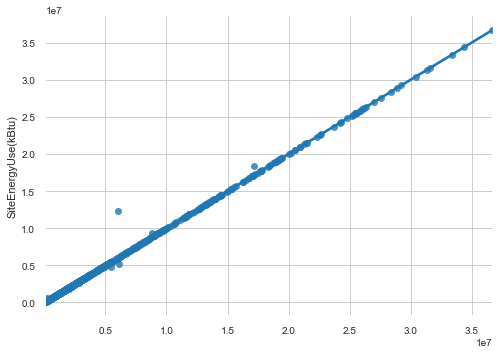

In [8]:
# Création de nouvelles variables à partir des variables énergétiques
sns.regplot(df['NaturalGas(kBtu)'] + df['SteamUse(kBtu)'] +
            df['Electricity(kBtu)'], df['SiteEnergyUse(kBtu)'])
plt.grid(True)

Le résultat ci-dessus nous laisse supposer à quelques erreurs près que SiteEnergyUse = NaturalGas + SteamUse + Electricity. Ce résultat va nous permettre de calculer et d'utiliser en tant que features les proportions de chaque type d'énergie par batiment.

In [9]:
# Variables ratio énergie
df['elec_prop'] = df['Electricity(kBtu)'] / df['SiteEnergyUse(kBtu)']
df['steam_prop'] = df['SteamUse(kBtu)'] / df['SiteEnergyUse(kBtu)']
df['natgas_prop'] = df['NaturalGas(kBtu)'] / df['SiteEnergyUse(kBtu)']

IMPORTANT

On suppose que les ratios d'énergie ne varient pas au cours des années et qu'ils constituent donc des caractéristiques constantes propres à chaque batiment. Les consignes du projet indiquent la possibilité de faire appel à ces ratios bien que cela constituent une forme de data leakage. En effet, les variables énergétiques ne sont pas supposées être utilisées.

In [10]:
# Variables booléennes nature des énergies utilisées
df['elec_bool'] = (df['elec_prop'] > 0)
df['steam_bool'] = (df['steam_prop'] > 0)
df['natgas_bool'] = (df['natgas_prop'] > 0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 2 to 25042
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CouncilDistrictCode              763 non-null    float64
 1   YearBuilt                        763 non-null    float64
 2   NumberofBuildings                763 non-null    float64
 3   NumberofFloors                   763 non-null    float64
 4   PropertyGFATotal                 763 non-null    float64
 5   PropertyGFAParking               763 non-null    float64
 6   LargestPropertyUseTypeGFA        763 non-null    float64
 7   SecondLargestPropertyUseTypeGFA  763 non-null    float64
 8   ENERGYSTARScore                  476 non-null    float64
 9   SiteEnergyUse(kBtu)              763 non-null    float64
 10  SteamUse(kBtu)                   763 non-null    float64
 11  Electricity(kBtu)                763 non-null    float64
 12  NaturalGas(kBtu)    

In [12]:
# Définition des features
features_initial = ['CouncilDistrictCode',
                    'YearBuilt',
                    'NumberofBuildings',
                    'NumberofFloors',
                    'PropertyGFATotal',
                    'PropertyGFAParking',
                    'LargestPropertyUseTypeGFA',
                    'SecondLargestPropertyUseTypeGFA',
                    'ENERGYSTARScore',
                    'BuildingType',
                    'PrimaryPropertyType',
                    'Neighborhood',
                    'ListOfAllPropertyUseTypes',
                    'LargestPropertyUseType',
                    'SecondLargestPropertyUseType',
                    'DefaultData',
                    'elec_prop',
                    'steam_prop',
                    'natgas_prop',
                    'elec_bool',
                    'steam_bool',
                    'natgas_bool']

In [13]:
print("Nombres de features initials = {}".format(len(features_initial)))

Nombres de features initials = 22


In [14]:
# Définition des variables numériques et catégorielles
numerical_cols = df[features_initial].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df[features_initial].select_dtypes(include=['object', 'bool']).columns

## Train Test Split

In [15]:
# Split en jeu d'entrainement et de test
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, train_size=0.8, random_state=0)

In [16]:
#Nombre de lignes dans train_set
len(train_set)

610

Le dataset est divisé en jeu d'entraînement (80% du dataset) et jeu de test (20% du dataset).

## Preprocessor : Définition des étapes de preprocessing

In [17]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler()),  
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('encoder', TargetEncoder()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('std_scaler', StandardScaler()),  
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

Les variables numériques sont imputées par leurs moyennes puis sont standardisées (centrage autour de 0 pour avoir une distribution se rapprochant de la normale : prérequis pour le bon fonctionnement des regresseurs).

Les variables catégorielles sont quant à elles encodées avec TargetEncoder. Cet encodeur permet de prendre en compte des variables catégorielles avec une cardinalité élevée sans rajouter de dimensions au dataset. Enfin comme précédemment, les variables sont imputées puis standardisées.

L'ensemble des étapes sont imbriquées dans preprocessor via ColumnTransformer.

## Pipeline - TransformedTargetRegressor

Dans cette partie, nous nous intéressons à l'intérêt de l'utilisation de TransformedTargetRegressor avec PowerTransformer(method='yeo-johnson').

Deux pipelines sont définis : un avec TransformedTargetRegressor et au autre sans.

TransformedTargetRegressor transforme les targets avant de les fitter au modèle de régression. Les prédictions sont retransformées vers l'espace d'origine via une transformation inverse. Il prend comme argument le régresseur qui sera utilisé pour la prédiction, et le transformateur qui sera appliqué à la variable cible.

PowerTranformer est un transformer qui permet de réduire la skewness et de se rapprocher d'une loi normale.

In [18]:
# Bundle preprocessing and modeling code in a pipeline

def define_pipeline(preprocessor, regressor):

    modeling_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', regressor)
                                        ])

    return modeling_pipeline

In [19]:
# Bundle preprocessing and modeling code in a pipeline with target transformer

def define_full_pipeline(preprocessor, regressor):

    modeling_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', regressor)
                                        ])

    full_pipeline = TransformedTargetRegressor(
        regressor=modeling_pipeline, transformer=PowerTransformer(method='yeo-johnson', standardize=True))

    return full_pipeline

## Regressors

In [20]:
# Dictionnaire de regresseurs
regressors = {
    'Dummy': DummyRegressor(),
    'Linear': LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'Elastic Net': ElasticNet(),
    'SVR': SVR(kernel="rbf", C=300, gamma=1),
    'Random Forest': RandomForestRegressor(n_estimators=100, n_jobs=-1),
    'Extra Tree': ExtraTreesRegressor(n_estimators=100, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state = 42),
}

## Evaluation du pipeline avec et sans target transformer

Influence du score R2 et RMSE pour chaque régresseurs avec ou sans PowerTransformer

In [21]:
rmse_with = []
r2_with = []
rmse_without = []
r2_without = []

def plot_1(reg, features):

    with plt.style.context('bmh'):
        f, (ax0, ax1) = plt.subplots(1, 2, sharey=True)

        # Model without target transformation
        regr = define_pipeline(preprocessor, reg)
        regr.fit(train_set[features], train_set['SiteEnergyUse(kBtu)'])
        energy_pred = regr.predict(test_set[features])
        
        rmse_without.append(mean_squared_error(test_set['SiteEnergyUse(kBtu)'], energy_pred, squared=False))
        r2_without.append(r2_score(test_set['SiteEnergyUse(kBtu)'], energy_pred))

        ax0.scatter(test_set['SiteEnergyUse(kBtu)'], energy_pred)
        ax0.plot([0, 10**8], [0, 10**8], '--k')
        ax0.set_ylabel('Target predicted')
        ax0.set_xlabel('True Target')
        ax0.set_title(
            reg)
        ax0.text(0.5*10**7, 0.7*10**8, r'$R^2$=%.2f, MAE=%.2f, RMSE=%.2f' % (
            r2_score(test_set['SiteEnergyUse(kBtu)'], energy_pred), 
            median_absolute_error(test_set['SiteEnergyUse(kBtu)'], energy_pred), 
            mean_squared_error(test_set['SiteEnergyUse(kBtu)'], energy_pred, squared=False)))
        ax0.set_xlim([0, 0.7*10**8])
        ax0.set_ylim([0, 0.8*10**8])

        # Model with target transformation
        regr_trans = define_full_pipeline(preprocessor, reg)
        regr_trans.fit(train_set[features], train_set['SiteEnergyUse(kBtu)'])
        energy_pred_2 = regr_trans.predict(test_set[features])
        
        rmse_with.append(mean_squared_error(test_set['SiteEnergyUse(kBtu)'], energy_pred, squared=False))
        r2_with.append(r2_score(test_set['SiteEnergyUse(kBtu)'], energy_pred))

        ax1.scatter(test_set['SiteEnergyUse(kBtu)'], energy_pred_2)
        ax1.plot([0, 10**8], [0, 10**8], '--k')
        ax1.set_ylabel('Target predicted')
        ax1.set_xlabel('True Target')
        ax1.set_title("{} with target transformation".format(reg))
        ax1.text(0.5*10**7, 0.7*10**8, r'$R^2$=%.2f, MAE=%.2f, RMSE=%.2f' % (
            r2_score(test_set['SiteEnergyUse(kBtu)'], energy_pred_2), 
            median_absolute_error(test_set['SiteEnergyUse(kBtu)'], energy_pred_2), 
            mean_squared_error(test_set['SiteEnergyUse(kBtu)'], energy_pred_2, squared=False)))
        ax1.set_xlim([0, 0.7*10**8])
        ax1.set_ylim([0, 0.8*10**8])

        f.suptitle("SiteEnergyUse(kBtu) predictions", x=0.6, y=0.05)
        f.tight_layout(rect=[0.05, 0.05, 1.2, 1.2])

        plt.show()

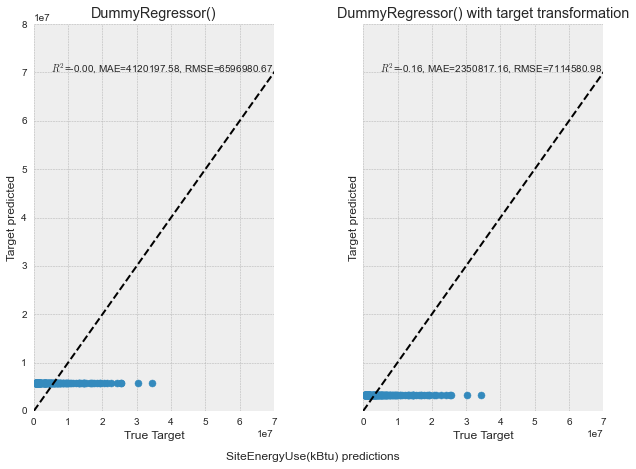

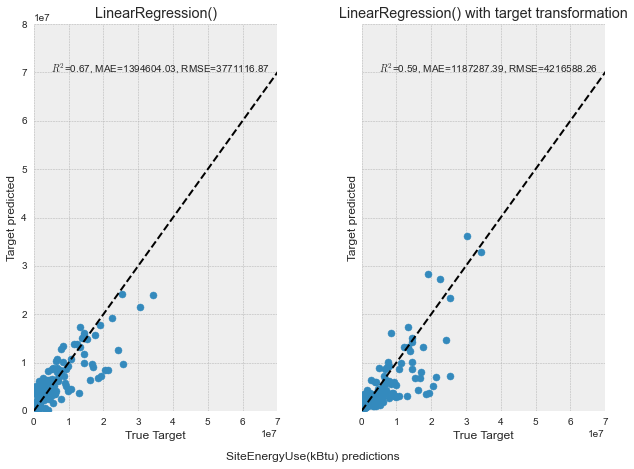

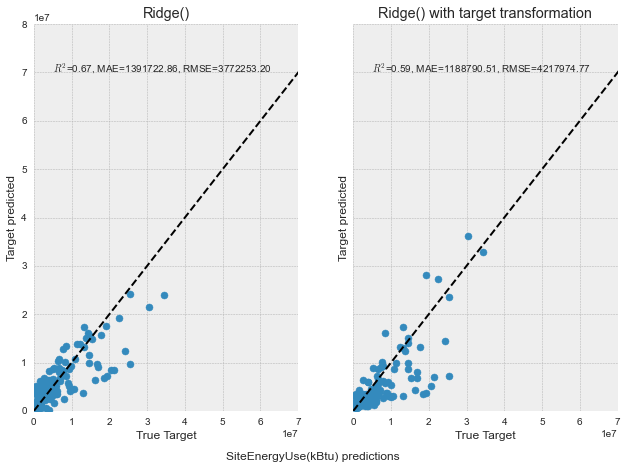

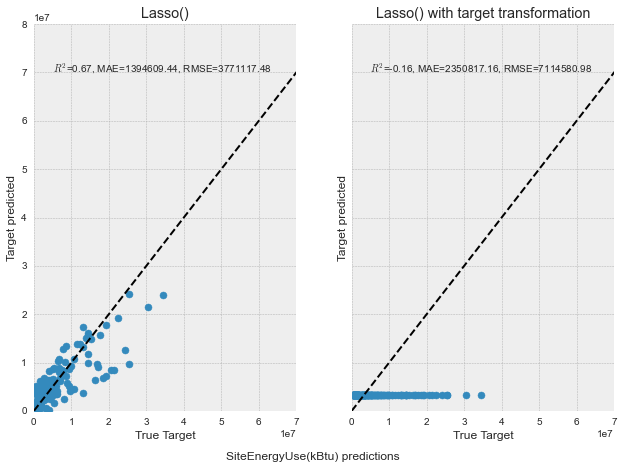

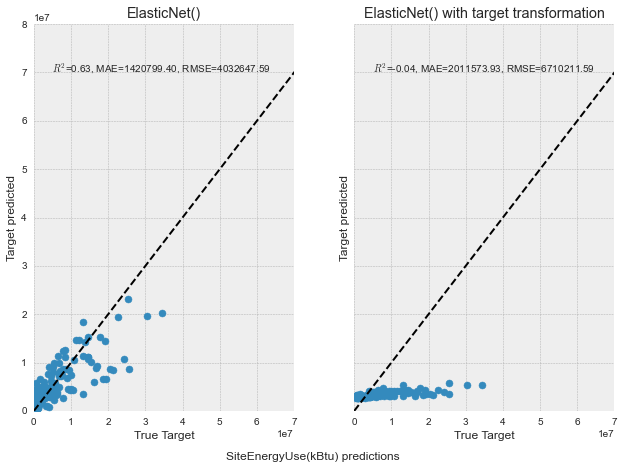

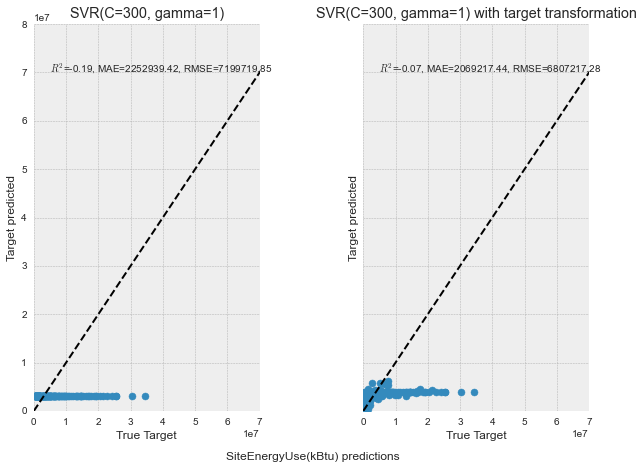

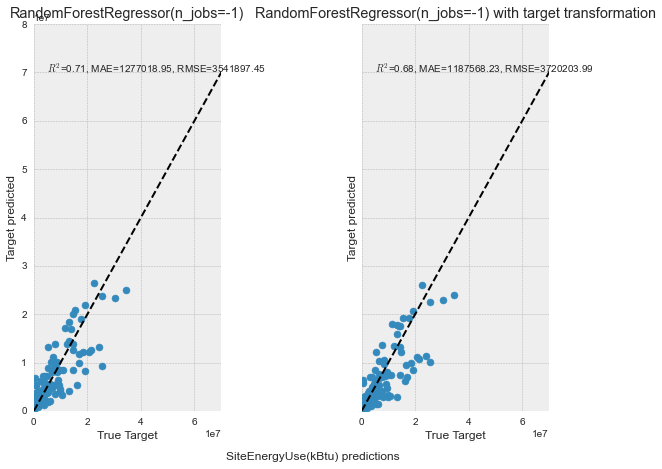

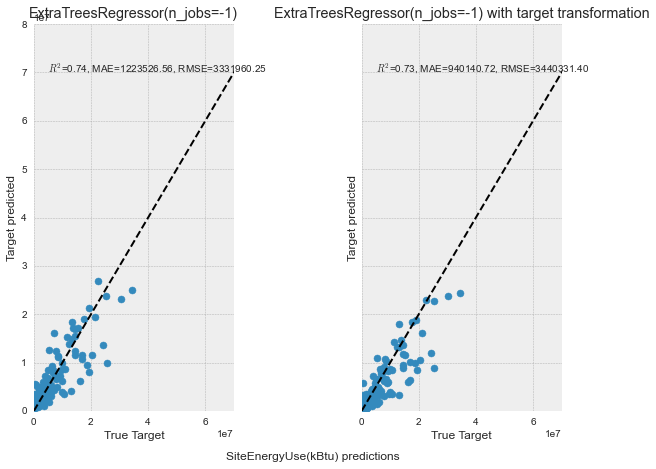

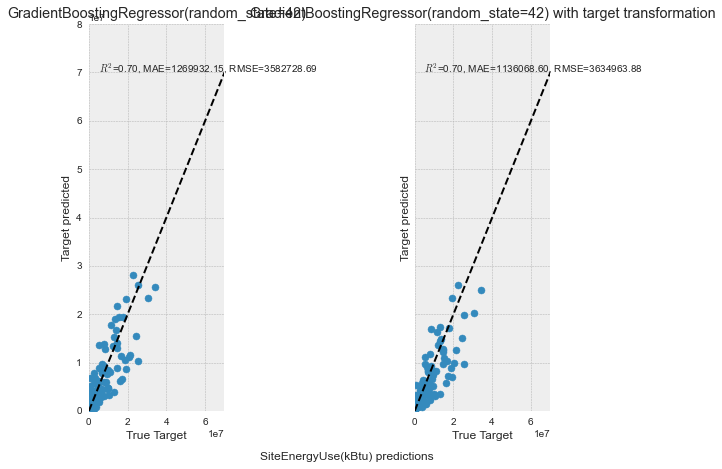

In [22]:
for name_reg, reg in regressors.items() :
    plot_1(reg, features_initial)

PowerTransformer n’améliore pas le score R2 et RMSE sur aucun des modèles testés, TargetTransformer est donc rejeté. D'autres transfomers similaires telle que QuantileTransformer ont été testés mais ils n'ont pas apporté d'amélioration significative.

## Modèle pour la variable énergie

Recherche du meilleur modèle pour la prédiction de la variable énergie basée sur le score RMSE et R2 obtenus par cross-validation.

In [23]:
# Dictionnaires de résultats
y_pred = {}
rmse = {}
r2 = {}
final_model = {}

# Résultats, moyenne et écart-type
def display_scores(scores, scoring=["neg_mean_squared_error", "r2"]) :
    
    print("Resultats de la cross validation :")
     
    for metric in scoring : 
    
        print("Métrique utilisé : {} \n".format(metric))
        results = -scores["test_" + metric]
        if metric == "neg_mean_squared_error" :
            results = np.sqrt(results) #RMSE
        elif metric == "r2" :
            results = scores["test_" + metric]
            
        print("\t - Moyenne :", results.mean())
        print("\t - Ecart-type :", results.std())
        print("\t - Coefficient de variation : {:.2f} %".format(results.std()/results.mean()*100))
        print("\n")

Kfold permet de diviser le dataset en un nombre K de sections (folds) où chaque fold est utilisé en tant que test set et train set.

In [24]:
# Cross validation avec 2 métriques
def cross_val(estimator, X, y):

    kf = KFold(n_splits=10)

   
    scores = cross_validate(estimator,
                            X,
                            y,
                            scoring=["neg_mean_squared_error",
                                     "neg_mean_absolute_error",
                                     "r2"],
                            cv=kf)

    return scores

In [25]:
# Les regresseurs sont testés 1 à 1 par cross-validation
for name_reg, reg in regressors.items():
    
    print("_____", name_reg, "_____")

    pipeline = define_pipeline(preprocessor, reg)

    # cross-validation
    scores = cross_val(pipeline,
                       train_set[features_initial],
                       train_set['SiteEnergyUse(kBtu)'])

    # calcul de la RMSE
    rmse[name_reg] = np.sqrt(-scores["test_neg_mean_squared_error"])

    # calcul de R2
    r2[name_reg] = scores["test_r2"]

    # Affichage des résultats
    display_scores(scores,
                   scoring=["neg_mean_squared_error",
                            "r2"])

_____ Dummy _____
Resultats de la cross validation :
Métrique utilisé : neg_mean_squared_error 

	 - Moyenne : 6520743.397632839
	 - Ecart-type : 537654.0118552682
	 - Coefficient de variation : 8.25 %


Métrique utilisé : r2 

	 - Moyenne : -0.006468504324049817
	 - Ecart-type : 0.010269644324005458
	 - Coefficient de variation : -158.76 %


_____ Linear _____
Resultats de la cross validation :
Métrique utilisé : neg_mean_squared_error 

	 - Moyenne : 3430808.963106134
	 - Ecart-type : 516703.29731886974
	 - Coefficient de variation : 15.06 %


Métrique utilisé : r2 

	 - Moyenne : 0.7139428863205474
	 - Ecart-type : 0.07915412647863289
	 - Coefficient de variation : 11.09 %


_____ Ridge _____
Resultats de la cross validation :
Métrique utilisé : neg_mean_squared_error 

	 - Moyenne : 3425884.1982041458
	 - Ecart-type : 512260.038273666
	 - Coefficient de variation : 14.95 %


Métrique utilisé : r2 

	 - Moyenne : 0.7148234957604274
	 - Ecart-type : 0.07849479711672303
	 - Coefficien

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806271115509178.2, tolerance: 2331880203676.096
  positive)


Resultats de la cross validation :
Métrique utilisé : neg_mean_squared_error 

	 - Moyenne : 3430805.9161225334
	 - Ecart-type : 516701.25741837977
	 - Coefficient de variation : 15.06 %


Métrique utilisé : r2 

	 - Moyenne : 0.7139434161348739
	 - Ecart-type : 0.07915380641944787
	 - Coefficient de variation : 11.09 %


_____ Elastic Net _____
Resultats de la cross validation :
Métrique utilisé : neg_mean_squared_error 

	 - Moyenne : 3571711.061183831
	 - Ecart-type : 432997.3794260829
	 - Coefficient de variation : 12.12 %


Métrique utilisé : r2 

	 - Moyenne : 0.6937061168909334
	 - Ecart-type : 0.06535532200918516
	 - Coefficient de variation : 9.42 %


_____ SVR _____
Resultats de la cross validation :
Métrique utilisé : neg_mean_squared_error 

	 - Moyenne : 7059835.76734768
	 - Ecart-type : 560262.6720912571
	 - Coefficient de variation : 7.94 %


Métrique utilisé : r2 

	 - Moyenne : -0.18202420840001218
	 - Ecart-type : 0.06365947257293302
	 - Coefficient de variation : -34

In [26]:
# Barplot des résultats
def graphical_display(results, title) :
    
    x = list(results)
    y = np.array(list(results.values()))
    mean = [score.mean() for score in np.array(list(results.values()))]

    fig = plt.figure(1, figsize=(10,15))
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1
    
    plt.subplot(311)
    sns.barplot(x=x, y=mean)
    plt.ylabel("Moyenne")
    plt.title(title)
    for index, value in enumerate(mean):
        plt.text(index-0.3, value+0.2, str("{:.2e}".format(value)))
    
    plt.show()

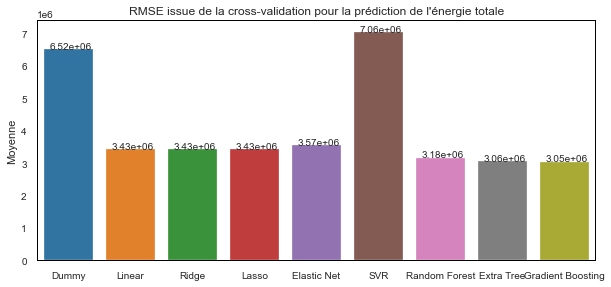

In [27]:
# Affichage des résultats de la RMSE pour chaque modèle
graphical_display(rmse, "RMSE issue de la cross-validation pour la prédiction de l'énergie totale")

Les deux modèles ayant la RMSE la plus élevée sont Dummy et SVR.
Les trois modèles ayant les meilleures RMSE sont Random Forest, Extra Tree et Gradient Boosting. On s'intéresse par la suite à ces 3 modèles en particulier.

In [28]:
models_to_plot = ['Random Forest',
                  'Extra Tree',
                  'Gradient Boosting']

In [29]:
# Boxplot des résultats
def boxplot(results, title, ylabel) :
    
    with plt.style.context('bmh'):        
        fig = plt.figure(1, figsize=(5,5))
        plt.rcParams["axes.edgecolor"] = "black"
        plt.rcParams["axes.linewidth"] = 1

        plt.boxplot([results[model] for model in models_to_plot], labels=models_to_plot)
        plt.ylabel(ylabel)
        plt.title(title)

        plt.show()

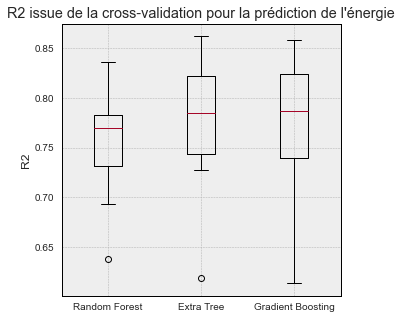

In [30]:
boxplot(r2, "R2 issue de la cross-validation pour la prédiction de l'énergie", "R2")

Gradient Boosting obtient le meilleur R2. Ce regresseur sera conservé pour l'optimisation.

In [31]:
print('Les scores pour R2 et RMSE sont respectivement de {} et de {} soit {:.2%} d\'erreur par rapport à la valeur maximale de l\'énergie pour le modèle avec Gradient Boosting Regressor.'.format(r2['Gradient Boosting'].mean(), rmse['Gradient Boosting'].mean(), rmse['Gradient Boosting'].mean()/df['SiteEnergyUse(kBtu)'].max()))

Les scores pour R2 et RMSE sont respectivement de 0.7754971420490586 et de 3053453.2534504 soit 8.33% d'erreur par rapport à la valeur maximale de l'énergie pour le modèle avec Gradient Boosting Regressor.


In [32]:
# Valeurs particulières pour SiteEnergyUse
print("Valeur maximale = {}".format(df['SiteEnergyUse(kBtu)'].max()))
print("Valeur médiane = {}".format(df['SiteEnergyUse(kBtu)'].median()))
print("Valeur moyenne = {}".format(df['SiteEnergyUse(kBtu)'].mean()))

Valeur maximale = 36674116.0
Valeur médiane = 3196687.625
Valeur moyenne = 5836395.535572689


## Explication : Gradient Boosting Regressor

### Ensembles and boosting

Machine learning models can be fitted to data individually, or combined in an ensemble. An ensemble is a combination of simple individual models that together create a more powerful new model.

Machine learning boosting is a method for creating an ensemble. (Boosting is a general ensemble technique that involves sequentially adding models to the ensemble where subsequent models correct the performance of prior models.) It starts by fitting an initial model (e.g. a tree or linear regression) to the data. Then a second model is built that focuses on accurately predicting the cases where the first model performs poorly. The combination of these two models is expected to be better than either model alone. Then you repeat this process of boosting many times.  Each successive model attempts to correct for the shortcomings of the combined boosted ensemble of all previous models.

### Gradient boosting explained

Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error. How are the targets calculated? The target outcome for each case in the data depends on how much changing that case's prediction impacts the overall prediction error:

If a small change in the prediction for a case causes a large drop in error, then next target outcome of the case is a high value. Predictions from the new model that are close to its targets will reduce the error.
If a small change in the prediction for a case causes no change in error, then next target outcome of the case is zero. Changing this prediction does not decrease the error.
The name gradient boosting arises because target outcomes for each case are set based on the gradient of the error with respect to the prediction. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.

### Gradient Boosting Trees

- Sequentials correction of predecessor's errors
- Does not tweak the weight of training instances
- Each predictor is trained using its predecessor's residuals errors as labels

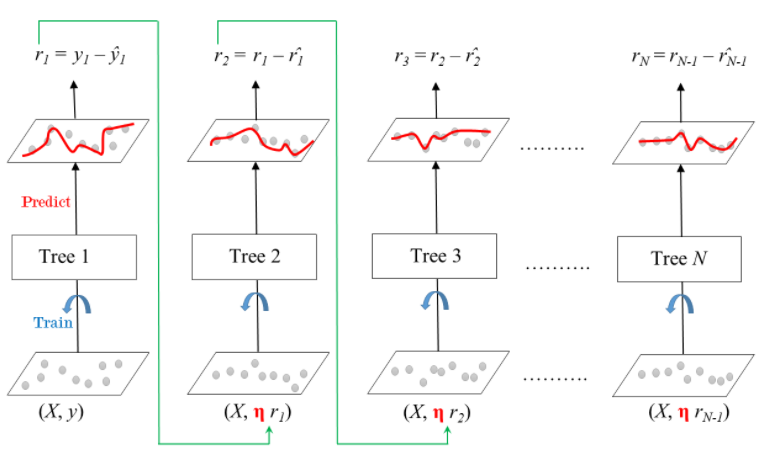

https://www.displayr.com/gradient-boosting-the-coolest-kid-on-the-machine-learning-block/#:~:text=Gradient%20boosting%20is%20a%20type,order%20to%20minimize%20the%20error.

https://www.tomasbeuzen.com/post/scikit-learn-gridsearch-pipelines/

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_ridge_regression.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-ridge-regression-py
    
https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html

Models comparisons
https://aaronmams.github.io/A-quick-and-dirty-machine-learning-post-with-Python-and-scikit-learn/
https://towardsdatascience.com/quick-and-dirty-ml-toolbox-3650d34cf0e0

## Optimisation du modèle - variable énergie

Tuning the hyper-parameters of an estimator
https://scikit-learn.org/stable/modules/grid_search.html#grid-search

A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning
https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

Grid Search Hyperparameters for Gradient Boosting Algorithm
https://machinelearningmastery.com/gradient-boosting-machine-ensemble-in-python/

GridsearchCV with modeling pipeline : https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

In [33]:
from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV : set up a grid of hyperparameter values and select random combinations to train the model and score. The number of search iterations is set based on time/resources.

In [34]:
# Hyperparamètres pour les modèles ensemblistes d'arbres de regression
param_grid_reg_tree = {
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'], # Méthode d'imputation des variables numériques
    'preprocessor__cat__imputer__strategy': ['mean', 'median'], # Méthode d'imputation des variables catégorielles
    'regressor__n_estimators' : [100, 150, 175, 200], # Nombre d'arbres
    'regressor__max_depth' : range(1, 10, 1), # Profondeurs maximums des arbres
    'regressor__max_features' : range(1, 10, 1), # Nombre de maximum de features considéré à chaque noeud de décision
    'regressor__learning_rate': [0.07, 0.1, 0.12, 0.14] # Taux d'apprentissage
}

In [35]:
# Fonction d'optimisation du modèle
def optimiser(regressor, preprocessor, x, y, target_name):
    # Définition du modèle avec les hyperparamètres par défaut
    model = define_pipeline(preprocessor, regressor)

    # Définition de la procédure d'évaluation
    cv = KFold(n_splits=10, shuffle=True)

    # Définition de la procédure RandomizedSearchCV 
    grid_search = RandomizedSearchCV(model, param_grid_reg_tree, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, n_iter=100,
                                     random_state=42)

    # Execution de la grid search
    grid_result = grid_search.fit(x, y)

    score = grid_result.best_estimator_.score(x, y)  # calcul du R2 sur tout le jeu d'entrainement
    
    final_model[target_name] = grid_result.best_estimator_
    print("Hyperparamètres du meilleur modèle :", grid_result.best_params_)
    print('\n')
    print('____', 'SCORES :''____')
    print("R2 score sur tout le jeux d'entrainement: ", score)
    print("Moyenne cross-validée de la RMSE du meilleur modèle sur le jeu d'entrainement:",
          np.sqrt(-grid_result.best_score_))

In [36]:
# Optimisation du regresseur GradientBoostingRegressor pour la target SiteEnergyUse
optimiser(GradientBoostingRegressor(), 
          preprocessor, 
          train_set[features_initial], 
          train_set['SiteEnergyUse(kBtu)'], 
          'SiteEnergyUse(kBtu)')

Hyperparamètres du meilleur modèle : {'regressor__n_estimators': 100, 'regressor__max_features': 9, 'regressor__max_depth': 4, 'regressor__learning_rate': 0.12, 'preprocessor__num__imputer__strategy': 'median', 'preprocessor__cat__imputer__strategy': 'median'}


____ SCORES :____
R2 score sur tout le jeux d'entrainement:  0.9825869188892373
Moyenne cross-validée de la RMSE du meilleur modèle sur le jeu d'entrainement: 3047593.0333818607


In [37]:
# Fonction courbes d'apprentissage

train_sizes = [1, 50, 100, 200, 300, 400, 500, 610]

def learning_curves(estimator, data, features, target, train_sizes, cv, ylim):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes =
    train_sizes,
    cv = cv, 
    scoring = 'neg_mean_squared_error')
    
    train_scores_mean = np.sqrt(-train_scores.mean(axis = 1))
    validation_scores_mean = np.sqrt(-validation_scores.mean(axis = 1))

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('RMSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a GradientBoostingRegressor Model' 
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,ylim)

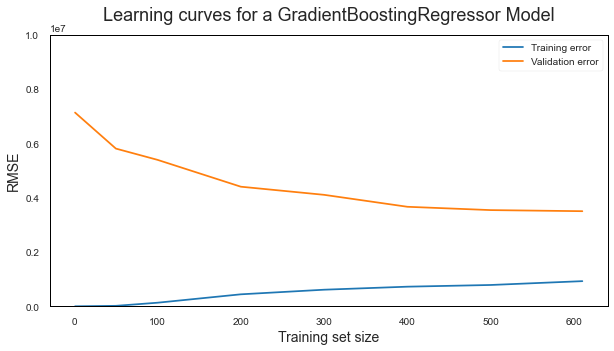

In [38]:
# Courbes d'apprentissage du modèle optimisé pour la prédiction de SiteEnergyUse avec tous les features

plt.figure(figsize = (10,5))

learning_curves(final_model["SiteEnergyUse(kBtu)"], df, features_initial, 'SiteEnergyUse(kBtu)', train_sizes=train_sizes, cv = 5, 
                ylim = 10**7)

Si l'erreur sur les données d'apprentissage est très faible, cela signifie que les données d'apprentissage ont très bien fitté sur le modèle. Si le modèle fitte très bien aux données d'apprentissage, cela signifie qu'il a un faible biais par rapport à cet ensemble de données.

In [39]:
# Barplot de l'importance de la contribution de chaque variable au modèle
def plot_feature_importances(target, features):
    
    feature_importances = final_model[target][-1].feature_importances_

    # Les features sont triés par importance pour l'affichage graphique
    features_labels = [attrib for value, attrib in sorted(zip(feature_importances, features), reverse=True)]
    features_values = [value for value, attrib in sorted(zip(feature_importances, features), reverse=True)]

    # Affichage Bar Plot
    fig = plt.figure(1, figsize=(12,5))
    sns.barplot(x=features_labels[0:30], y=[100*v for v in features_values[0:30]], orient='v')
    plt.ylabel("%")
    plt.title("Features Importances")
    plt.xticks(rotation=90)
    plt.show()

https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/#:~:text=Feature%20Importance%20in%20Gradient%20Boosting,importance%20scores%20for%20each%20attribute.&text=The%20feature%20importances%20are%20then,decision%20trees%20within%20the%20model.

A benefit of using gradient boosting is that after the boosted trees are constructed, it is relatively straightforward to retrieve importance scores for each attribute.

Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model.

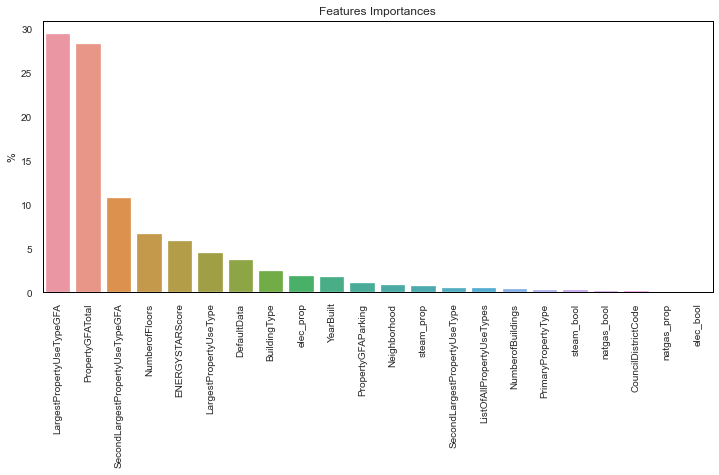

In [40]:
plot_feature_importances('SiteEnergyUse(kBtu)', features_initial)

Il s'avère que les variables LargestPropertyUseTypeGFA et PropertyGFATotal soient les plus importantes pour ce modèle.

### Optimisation avec Feature Selection

In [41]:
# Pourcentage de l'importance des variables pour la prédiction de SiteEnergyUse(kBtu)
feature_importances_energy = final_model['SiteEnergyUse(kBtu)'][-1].feature_importances_
feature_importances_energy

array([1.67755648e-03, 1.69858715e-02, 3.55284148e-03, 6.61768085e-02,
       2.82793021e-01, 1.02413509e-02, 2.94336670e-01, 1.07172893e-01,
       5.86482448e-02, 2.49183531e-02, 2.83246835e-03, 8.41311078e-03,
       5.26666868e-03, 4.42746340e-02, 5.38781305e-03, 3.64489480e-02,
       1.90059536e-02, 7.68593588e-03, 2.14634893e-05, 0.00000000e+00,
       2.30949212e-03, 1.84990108e-03])

In [42]:
# Features dont l'importance est supérieur à 6%
features_2_energy = [attrib for value, attrib in np.array(sorted(zip(feature_importances_energy, features_initial)))[
    np.array(sorted(feature_importances_energy)) > 0.06]]
features_2_energy

['NumberofFloors',
 'SecondLargestPropertyUseTypeGFA',
 'PropertyGFATotal',
 'LargestPropertyUseTypeGFA']

In [43]:
# Dataframes numériques et catégorielles avec nouveaux features
numerical_cols = df[features_2_energy].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df[features_2_energy].select_dtypes(include=['object', 'bool']).columns

# Mise à jour du preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

In [44]:
optimiser(GradientBoostingRegressor(), 
          preprocessor, 
          train_set[features_2_energy], 
          train_set['SiteEnergyUse(kBtu)'], 
          'SiteEnergyUse(kBtu)')

Hyperparamètres du meilleur modèle : {'regressor__n_estimators': 100, 'regressor__max_features': 3, 'regressor__max_depth': 1, 'regressor__learning_rate': 0.14, 'preprocessor__num__imputer__strategy': 'median', 'preprocessor__cat__imputer__strategy': 'mean'}


____ SCORES :____
R2 score sur tout le jeux d'entrainement:  0.737902892935661
Moyenne cross-validée de la RMSE du meilleur modèle sur le jeu d'entrainement: 3809666.547322105


https://www.dataquest.io/blog/learning-curves-machine-learning/

Diagnose bias and variance

Estimating variance can be done in at least two ways:

- By examining the gap between the validation learning curve and training learning curve.
- By examining the training error: its value and its evolution as the training set sizes increase.

A narrow gap indicates low variance. Generally, the more narrow the gap, the lower the variance

https://www.dataquest.io/blog/learning-curves-machine-learning/

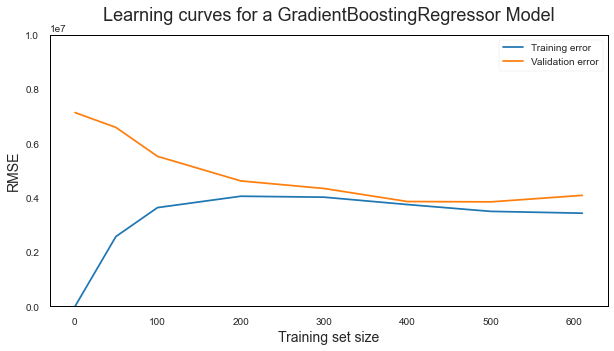

In [45]:
# Courbes d'apprentissage du modèle optimisé pour la prédiction de SiteEnergyUse avec selection de features

plt.figure(figsize = (10,5))

learning_curves(final_model["SiteEnergyUse(kBtu)"], df, features_2_energy, 'SiteEnergyUse(kBtu)', train_sizes=train_sizes, cv = 5, 
                ylim = 10**7)

Nos deux courbes semblent se stabiliser lorsque la taille du trainset augmente. L'erreur sur le jeu de validation est relativement proche de celle obtenu sur le trainset. Cependant les erreurs sur les deux courbes restent élevées, notre modèle souffre d'un problème d'underfitting causé par un biais élevé. 

Apporter plus données sur le trainset ne va pas améliorer les performances sur le jeu de validation.

Ajouter des features pertinentes pourrait améliorer le modèle en ajoutant de la complexité.

In [46]:
# Fonction prédiction de la target à partir du jeu test
def plot_2(target, features):
    with plt.style.context('bmh'):

        plt.scatter(test_set[target],
                    final_model[target].predict(test_set[features]))
        plt.plot([0, max(test_set[target])], [0, max(test_set[target])], '--k')
        plt.ylabel('Target predicted')
        plt.xlabel('True Target')
        plt.title(target)
        plt.text(0.05*max(test_set[target]), 0.5*max(test_set[target]), r'$R^2$=%.2f, RMSE=%.2f' % (
            r2_score(test_set[target],
                     final_model[target].predict(test_set[features])),
            mean_squared_error(test_set[target],
                               final_model[target].predict(test_set[features]), squared=False)))
        plt.xlim([0, max(final_model[target].predict(test_set[features]))])
        plt.ylim([0, max(final_model[target].predict(test_set[features]))])

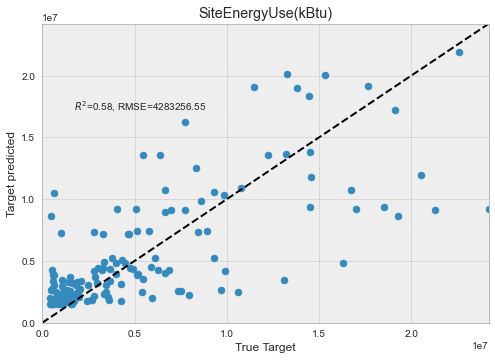

In [47]:
# Prédiction SiteEnergyUse dataset test
plot_2('SiteEnergyUse(kBtu)', features_2_energy)

## Modèle pour la variable émissions

In [48]:
# Dictionnaires de résultats
y_pred = {}
rmse = {}
r2 = {}

# Les regressors sont testés 1 à 1 par cross-validation
for name_reg, reg in regressors.items():
    print("_____", name_reg, "_____")

    pipeline = define_pipeline(preprocessor, reg)

    # cross-validation
    scores = cross_val(pipeline,
                       train_set[features_initial],
                       train_set['TotalGHGEmissions'])

    # calcul de la RMSE
    rmse[name_reg] = np.sqrt(-scores["test_neg_mean_squared_error"])

    # calcul de R2
    r2[name_reg] = scores["test_r2"]

    # Affichage des résultats
    display_scores(scores,
                   scoring=["neg_mean_squared_error",
                            "neg_mean_absolute_error",
                            "r2"])

_____ Dummy _____
Resultats de la cross validation :
Métrique utilisé : neg_mean_squared_error 

	 - Moyenne : 142.77684183316236
	 - Ecart-type : 23.954897825557282
	 - Coefficient de variation : 16.78 %


Métrique utilisé : neg_mean_absolute_error 

	 - Moyenne : 94.74999175848787
	 - Ecart-type : 8.074236431541834
	 - Coefficient de variation : 8.52 %


Métrique utilisé : r2 

	 - Moyenne : -0.011376519412504327
	 - Ecart-type : 0.019542548479970046
	 - Coefficient de variation : -171.78 %


_____ Linear _____
Resultats de la cross validation :
Métrique utilisé : neg_mean_squared_error 

	 - Moyenne : 130.54004311687422
	 - Ecart-type : 21.528026808941863
	 - Coefficient de variation : 16.49 %


Métrique utilisé : neg_mean_absolute_error 

	 - Moyenne : 82.77759227718505
	 - Ecart-type : 8.036650198891223
	 - Coefficient de variation : 9.71 %


Métrique utilisé : r2 

	 - Moyenne : 0.14325728728814696
	 - Ecart-type : 0.12361071734641722
	 - Coefficient de variation : 86.29 %


____

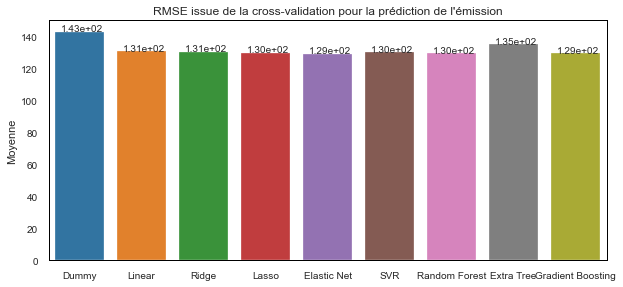

In [49]:
# Affichage des résultats de la RMSE
graphical_display(rmse, "RMSE issue de la cross-validation pour la prédiction de l'émission")

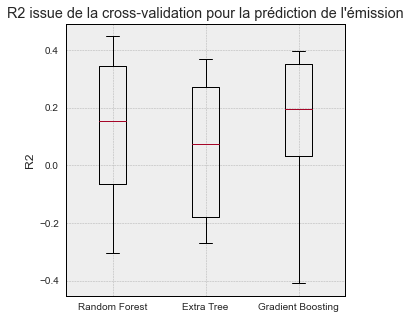

In [50]:
# Boxplot des résultats
boxplot(r2, "R2 issue de la cross-validation pour la prédiction de l'émission", "R2")

In [51]:
df['TotalGHGEmissions'].max()

1112.25

In [52]:
print('Les scores pour R2 et RMSE sont respectivement de {} et de {} soit {:.2%} d\'erreur par rapport à la valeur maximale des émissions de CO2 pour le modèle avec Gradient Boosting Regressor.'.format(r2['Gradient Boosting'].mean(), rmse['Gradient Boosting'].mean(), rmse['Gradient Boosting'].mean()/df['TotalGHGEmissions'].max()))

Les scores pour R2 et RMSE sont respectivement de 0.12440486668833824 et de 129.45819202228586 soit 11.64% d'erreur par rapport à la valeur maximale des émissions de CO2 pour le modèle avec Gradient Boosting Regressor.


## Optimisation du modèle - variable émission

In [53]:
# Mise à jour avec features initiales
numerical_cols = df[features_initial].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df[features_initial].select_dtypes(include=['object', 'bool']).columns

In [54]:
# Mise à jour du preprocessor avec features initiales
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

In [55]:
# Hyperparamètres pour les modèles ensemblistes d'arbres de regression
param_grid_reg_tree = {
    'preprocessor__num__imputer__strategy': ['mean', 'median', 'most_frequent'],# Méthode d'imputation des variables numériques
    'preprocessor__cat__imputer__strategy': ['mean', 'median'], # Méthode d'imputation des variables catégorielles
    'regressor__n_estimators' : [100, 110, 115, 120, 125, 130, 135], # Nombre d'arbres
    'regressor__max_depth' : range(1, 10 , 1), # Nombre de profondeurs maximums
    'regressor__max_features' : range(1, 10 , 1), # Nombre de maximum de features
    'regressor__learning_rate': [0.05, 0.1, 0.11, 0.12, 0.13, 0.2, 0.3] #Taux d'apprentissage
}

In [56]:
optimiser(GradientBoostingRegressor(),
          preprocessor,
          train_set[features_initial],
          train_set['TotalGHGEmissions'],
          'TotalGHGEmissions')

Hyperparamètres du meilleur modèle : {'regressor__n_estimators': 100, 'regressor__max_features': 6, 'regressor__max_depth': 3, 'regressor__learning_rate': 0.1, 'preprocessor__num__imputer__strategy': 'most_frequent', 'preprocessor__cat__imputer__strategy': 'mean'}


____ SCORES :____
R2 score sur tout le jeux d'entrainement:  0.9500264343670097
Moyenne cross-validée de la RMSE du meilleur modèle sur le jeu d'entrainement: 79.55258494790225


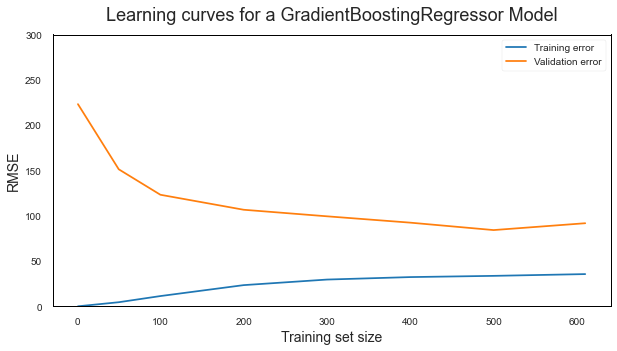

In [57]:
plt.figure(figsize = (10,5))

learning_curves(final_model["TotalGHGEmissions"], df, features_initial, 'TotalGHGEmissions', train_sizes=train_sizes, cv = 5, 
                ylim = 300)

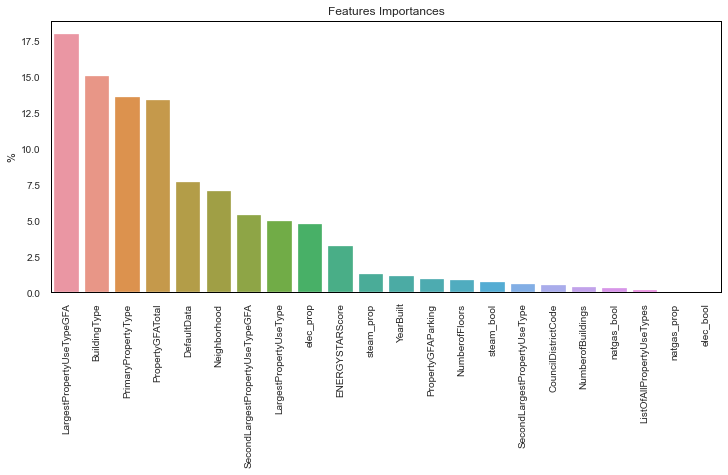

In [58]:
plot_feature_importances('TotalGHGEmissions', features_initial)

Il s'avère que les variables BuildingType, PropertyGFATotal et LargestPropertyUseTypeGFA soient les plus importantes pour ce modèle. La variable ENERGYSTARScore n'y contribue que très peu. Cette dernière n'est que peu pertinene pour la préduction des émissions de CO2.

### Optimisation avec Feature Selection

In [59]:
# Pourcentage de l'importance des variables pour la prédiction de TotalGHGEmissions
feature_importances_emissions = final_model['TotalGHGEmissions'][-1].feature_importances_
feature_importances_emissions

array([0.00534713, 0.01126136, 0.0036414 , 0.00878881, 0.13394419,
       0.00911801, 0.17987019, 0.05357873, 0.03228983, 0.15067565,
       0.13606627, 0.07024142, 0.00174675, 0.04982626, 0.00600913,
       0.07702684, 0.04764804, 0.01253911, 0.        , 0.        ,
       0.00722793, 0.00315296])

In [60]:
# Features dont l'importance est supérieur à 4%
features_2_emissions = [attrib for value, attrib in np.array(sorted(zip(feature_importances_emissions, features_initial)))[np.array(sorted(feature_importances_emissions))>0.075]]
features_2_emissions

['DefaultData',
 'PropertyGFATotal',
 'PrimaryPropertyType',
 'BuildingType',
 'LargestPropertyUseTypeGFA']

In [61]:
# Dataframes numériques et catégorielles avec nouveaux features
numerical_cols = df[features_2_emissions].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df[features_2_emissions].select_dtypes(include=['object', 'bool']).columns

# Mise à jour du preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

In [62]:
optimiser(GradientBoostingRegressor(), 
          preprocessor, 
          train_set[features_2_emissions], 
          train_set['TotalGHGEmissions'], 
          'TotalGHGEmissions')

Hyperparamètres du meilleur modèle : {'regressor__n_estimators': 130, 'regressor__max_features': 1, 'regressor__max_depth': 1, 'regressor__learning_rate': 0.13, 'preprocessor__num__imputer__strategy': 'most_frequent', 'preprocessor__cat__imputer__strategy': 'median'}


____ SCORES :____
R2 score sur tout le jeux d'entrainement:  0.397941921405333
Moyenne cross-validée de la RMSE du meilleur modèle sur le jeu d'entrainement: 121.63241069385892


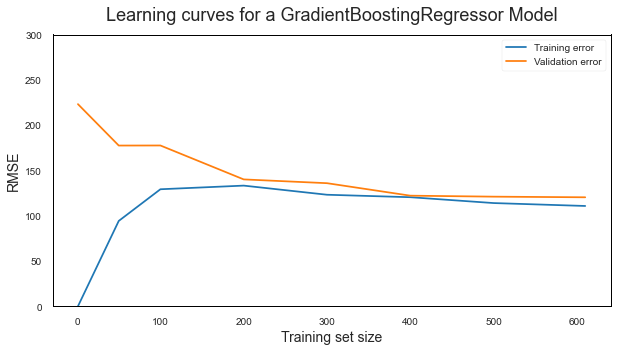

In [63]:
plt.figure(figsize = (10,5))

learning_curves(final_model["TotalGHGEmissions"], df, features_2_emissions, 'TotalGHGEmissions', train_sizes=train_sizes, cv = 5, 
                ylim = 300)

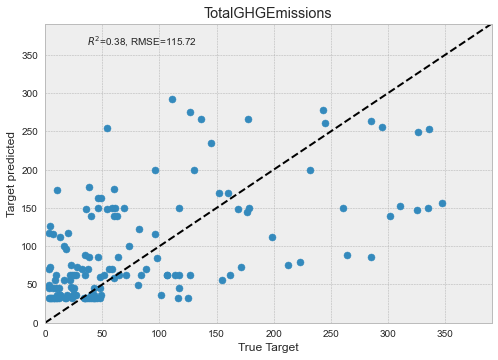

In [64]:
plot_2('TotalGHGEmissions', features_2_emissions)

## Evaluation de l'influence des hyperparamètres, prédiction de TotalGHGEmissions

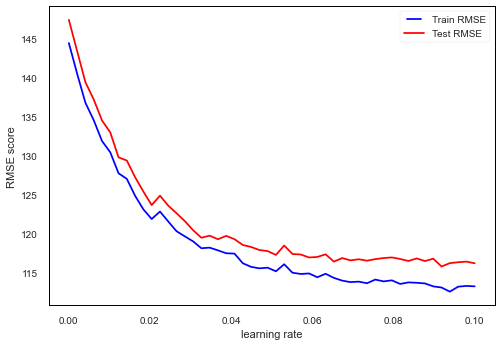

In [65]:
# Relation learning rate et RMSE
from matplotlib.legend_handler import HandlerLine2D
learning_rates = np.linspace(0.0001, 0.1, 50)
train_results = []
test_results = []

for v in learning_rates:
    model = final_model['TotalGHGEmissions'].set_params(
        regressor__learning_rate=v)
    model.fit(train_set[features_2_emissions], train_set['TotalGHGEmissions'])

    y_train_pred = model.predict(train_set[features_2_emissions])
    rmse = mean_squared_error(
        train_set['TotalGHGEmissions'], y_train_pred, squared=False)
    train_results.append(rmse)

    y_test_pred = model.predict(test_set[features_2_emissions])
    rmse = mean_squared_error(
        test_set['TotalGHGEmissions'], y_test_pred, squared=False)
    test_results.append(rmse)

line1, = plt.plot(learning_rates, train_results, 'b', label='Train RMSE')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('learning rate')
plt.show()

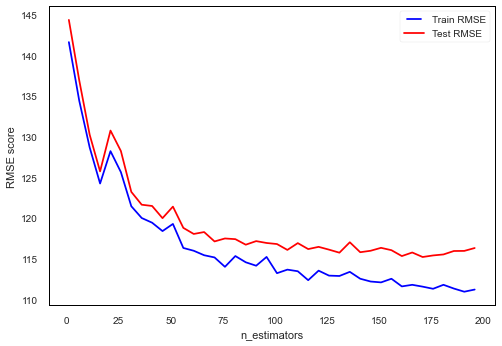

In [66]:
# Relation nombres d'arbres et RMSE
from matplotlib.legend_handler import HandlerLine2D
#learning_rates = param_grid_reg_tree['regressor__n_estimators']
n_estimators = range(1,200,5)

train_results = []
test_results = []

for v in n_estimators:
    model = final_model['TotalGHGEmissions'].set_params(
        regressor__n_estimators=v)
    model.fit(train_set[features_2_emissions], train_set['TotalGHGEmissions'])

    y_train_pred = model.predict(train_set[features_2_emissions])
    rmse = mean_squared_error(
        train_set['TotalGHGEmissions'], y_train_pred, squared=False)
    train_results.append(rmse)

    y_test_pred = model.predict(test_set[features_2_emissions])
    rmse = mean_squared_error(
        test_set['TotalGHGEmissions'], y_test_pred, squared=False)
    test_results.append(rmse)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('n_estimators')
plt.show()

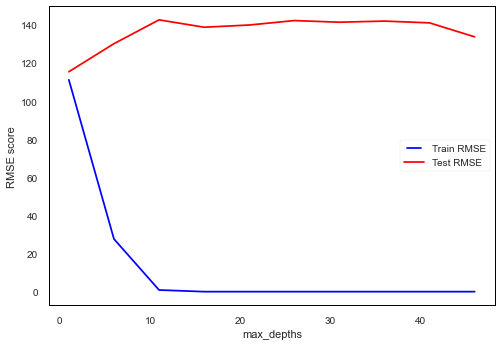

In [67]:
# Relation profondeur maximal des arbres et RMSE
from matplotlib.legend_handler import HandlerLine2D
#learning_rates = param_grid_reg_tree['regressor__n_estimators']
max_depths = range(1, 50 , 5)

train_results = []
test_results = []

for v in max_depths:
    model = final_model['TotalGHGEmissions'].set_params(
        regressor__max_depth=v)
    model.fit(train_set[features_2_emissions], train_set['TotalGHGEmissions'])

    y_train_pred = model.predict(train_set[features_2_emissions])
    rmse = mean_squared_error(
        train_set['TotalGHGEmissions'], y_train_pred, squared=False)
    train_results.append(rmse)

    y_test_pred = model.predict(test_set[features_2_emissions])
    rmse = mean_squared_error(
        test_set['TotalGHGEmissions'], y_test_pred, squared=False)
    test_results.append(rmse)

line1, = plt.plot(max_depths, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_depths, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('max_depths')
plt.show()

Amélioration : feature engineering, ajout de variables, polynomial features, modèle plus performant (XGBoost)